# Kasus - Klasifikasi Tulisan Tangan dengan Dataset MNIST

## Deskripsi Umum
Anda diminta untuk melakukan klasifikasi dengan menggunakan algoritma Naive Bayes dan SVM untuk merekognisi tulisan tangan dari dataset MNIST

## Tentang Dataset MNIST

Dataset MNIST (Modified National Institute of Standards and Technology) merupakan dataset berupa citra grayscale dengan ukuran 28x28 yang berisi tulisan tangan dari digit angka 0-9. Jumlah data dalam dataset ini adalah 70.000 data.

## Detail Kuis

1. Pastikan jumlah data setiap label angka (0-9). Apakah terdapat data imbalance pada dataset MNIST yang digunakan? Jelaskan jawaban kelompok Anda dan buktikan!

2. Tampilkan 15 buah citra pertama dari dataset MNIST berserta labelnya. Anda dapat menggunakan referensi dari Job Sheet 03.

3. Lakukan proses ekstraksi fitur pada data MNIST. Pada proses ini, Anda diperbolehkan untuk
    - Langsung menggunakan nilai asli dari citra (nilai asli setiap pixel dari dataset) sebagai fitur.
    - Melakukan ekstraksi fitur lain seperti histogram, PCA, atau yang lainnya. Anda diperbolehkan melakukan ekspolarasi pada proses ini.

4. Buatlah data training dan data testing menggunakan rasio 70:30, 80:20, 90:10.

4. Lakukan proses klasifikasi dengan menggunakan algoritma Naive Bayes dan SVM.
   - Anda diperbolehkan untuk melakukan tunning parameter.
   - Anda diperbolehkan mengeksplorasi jenis kernel yang digunakan pada SVM.

5. Evaluasi model yang Anda buat terhadap data training dan data testing.
   - Gunakan metric *accuracy* untuk mengetahui tingkat akurasi data training dan data testing.
   - Gunakan fungsi *classification_report* untuk mengetahui performa model secara holistik.
   - Gunakan confusion matrix untuk mengetahui tingkat ketepatan pelabelan.

6. Tampilkan citra data testing berserta hasil pelabelannya. Anda dapat menggunakan Job Sheet 03 sebagai acuan.

7. Apa model terbaik yang Anda dapatkan? Bagaimana konfigurasinya? Berapa tingkat akurasi yang didapatkan? Jelaskan!

# Bantuan

Berikut merupakan kode bantuan untuk proses mengunduh dataset MNIST

In [1]:
# Unduh Dataset MNIST
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

d:\folder_laptop\apk_desktop\Anaconda\installation\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [33]:
# Baca deskripsi dataset
mnist.target_names

['class']

In [3]:
# Inspeksi semua key dalam dataset
# Cara ini digunakan untuk memahami struktur dari dataset MNIST
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
# import library yang dibutuhkan
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


## 1. Mengecek keseimbangan dari data label

In [5]:
# memisahkan data label dan data target
X = np.array(mnist.data)
y = mnist.target.astype('int')

jumlah sampel untuk digit 0: 6903
jumlah sampel untuk digit 1: 7877
jumlah sampel untuk digit 2: 6990
jumlah sampel untuk digit 3: 7141
jumlah sampel untuk digit 4: 6824
jumlah sampel untuk digit 5: 6313
jumlah sampel untuk digit 6: 6876
jumlah sampel untuk digit 7: 7293
jumlah sampel untuk digit 8: 6825
jumlah sampel untuk digit 9: 6958


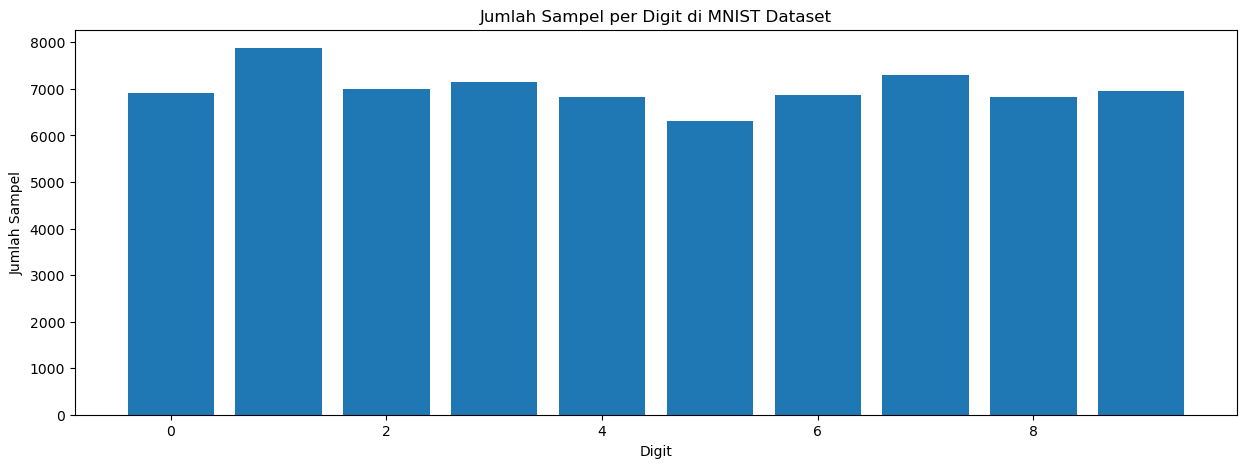

In [6]:
# menghitung jumlah sample pada setiap label 
label_counts = np.bincount(y)
# menampilkan hasil jumlah sampel dari masing2 label 
for i, count in enumerate(label_counts):
    print(f'jumlah sampel untuk digit {i}: {count}')
    
# visulisasikan jumlah sampel perdata pada label 
plt.figure(figsize=(15, 5))
plt.bar(range(10), label_counts)
plt.xlabel('Digit')
plt.ylabel('Jumlah Sampel')
plt.title("Jumlah Sampel per Digit di MNIST Dataset")
plt.show()

Berdasarakan hasil perhitungan dan visualisasi, dapat dilihat bahwa data label dari dataset MNIST terbilang seimbang. Hal ini dapat dilihat dari jumlah dari masing-masing data yang tidak ada perbedaan yang terlalu signifikan.

## 2. Menampilkan 15 citra pertama dari dataset MNIST

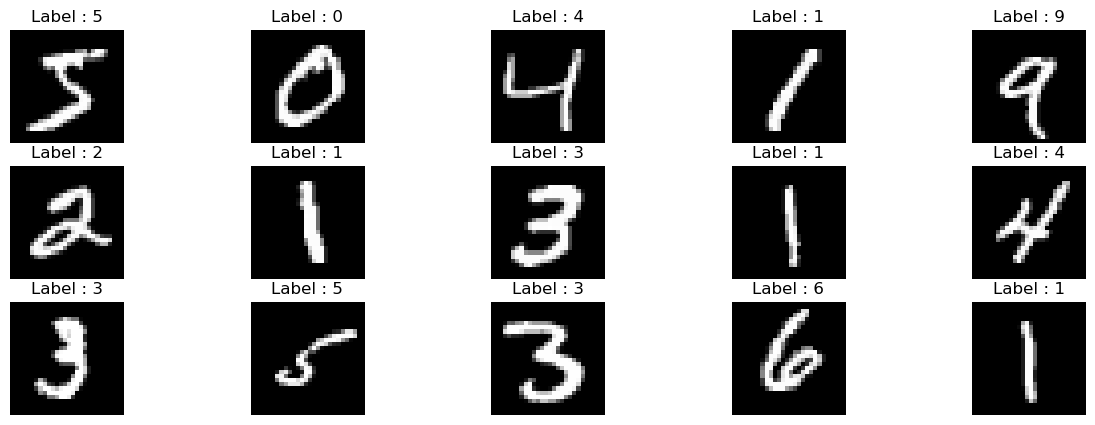

In [7]:
plt.figure(figsize=(15, 5))
for i in range(15):
    # mengubah ukuran gambar menjadi 3x5, 
    plt.subplot(3, 5, i+1)
    # menampilkan gambar dengan ukuran 28x28
    plt.imshow(X[i].reshape(28, 28), cmap='gray')
    # menampilkan label
    plt.title(f"Label : {y[i]}")
    # menghilangkan tampilan garis axis
    plt.axis('off')
plt.show()

## 3. Ekstraksi fitur 

### Dengan Menggunakan PCA

In [8]:
from sklearn.preprocessing import StandardScaler
# melakukan standarisasi
std = StandardScaler()
X_std = std.fit_transform(X)

In [9]:
from sklearn.decomposition import PCA
# Inisialisasi objek PCA dan nilai n_component yang dibutuhkan 
n_components = 49
model_pca = PCA(n_components=n_components)
# melakukan PCA pada data yang sudah distandarisasi
X_pca = model_pca.fit_transform(X_std)

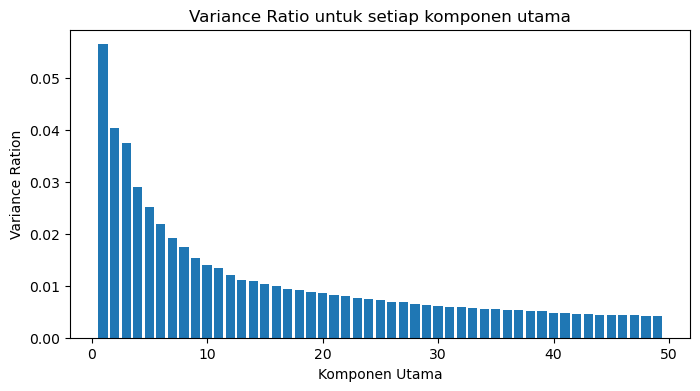

In [10]:
# Plot eigenvalues untuk melihat seberapa banyak varian yang dijelaskan oleh setiap komponen utama
plt.figure(figsize=(8, 4))
plt.bar(range(1, n_components + 1), model_pca.explained_variance_ratio_)
plt.xlabel('Komponen Utama')
plt.ylabel('Variance Ration')
plt.title('Variance Ratio untuk setiap komponen utama')
plt.show()

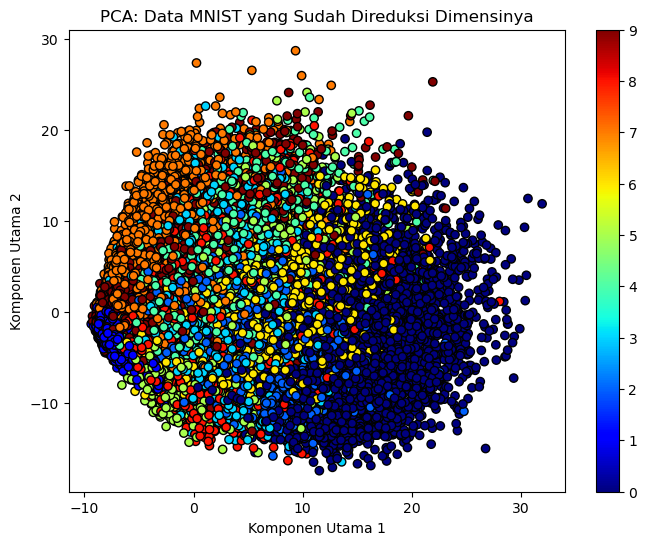

In [11]:
# Visualisasi data yang sudah direduksi dimensinya (dua dimensi pertama)
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='jet', edgecolors='k')
plt.colorbar()
plt.xlabel('Komponen Utama 1')
plt.ylabel('Komponen Utama 2')
plt.title('PCA: Data MNIST yang Sudah Direduksi Dimensinya')
plt.show()
# **Note : cari penjelasan Komponen**

### Dengan Menggunakan Histogram

In [12]:
# Fungsi untuk menhitung histogram 
def cal_histogram(image, bins=256):
    # Hitung histogram menggunakan np.histogram 
    histogram, _ = np.histogram(image, bins=bins, range=(0, 256))
    # Normalisasi Histogram 
    histogram = histogram / float(histogram.sum())
    return histogram 

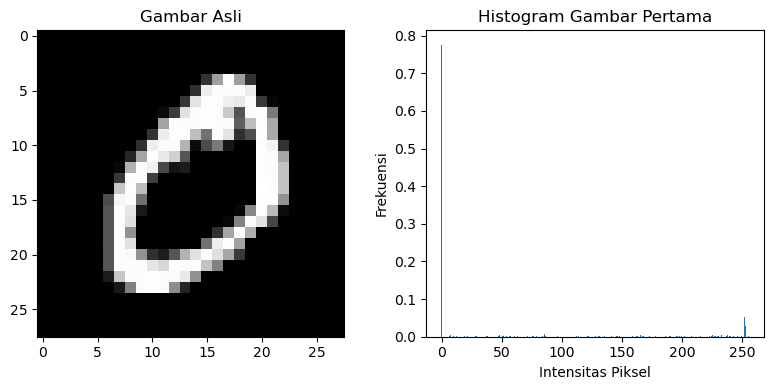

In [13]:
image_index = 1
sample_image = X[image_index].reshape(28,28)
histogram = cal_histogram(sample_image)

# Plot gambar asli
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(sample_image, cmap="gray")
plt.title("Gambar Asli")

# Plot histogram gambar pertama
plt.subplot(1, 2, 2)
plt.bar(range(len(histogram)), histogram)
plt.xlabel("Intensitas Piksel")
plt.ylabel("Frekuensi")
plt.title("Histogram Gambar Pertama")
plt.tight_layout()
plt.show()

## 4. Splitting Data Train dan Data Test

In [14]:
from sklearn.model_selection import train_test_split as split
X_train, X_test, y_train, y_test = split(X_pca, y, test_size=0.3, random_state=42)

## 5. Klasifikasi 

### Dengan SVM

In [15]:
# impor library yang dibutuhkan 
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

In [16]:
# inisialisasi model SVC
model_svc = SVC(kernel='rbf')
# menentukan params grid 
# params_grid = {
#     'C':[1, 10, 100],
#     'gamma':[0.001, 0.01, 0.1]
# }

In [17]:
# inisialisasi model grid search
# model_grs = GridSearchCV(model_svc, params_grid)
# # fit model
# model_grs.fit(X_train, y_train)

### Dengan Menggunakan Gaussian Naive Bayes

In [18]:
# import library gaussian naive bayes
from sklearn.naive_bayes import GaussianNB
# inisialisasi model gaussian naive bayes
model_gnb = GaussianNB()

In [19]:
model_gnb.fit(X_train, y_train)

GaussianNB()

In [36]:
# prediksi label pada data pengujian
y_pred = model_gnb.predict(X_test)

In [21]:
accuracy_score = accuracy_score(y_test, y_pred)

In [23]:
print('Akurasi Skor: ', accuracy_score)

Akurasi Skor:  0.7248571428571429


KeyError: 0

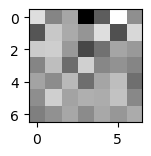

In [41]:
plt.figure(figsize=(15, 5))
for i in range(len(y_test)):
    plt.subplot(3, 5, i + 1)
    plt.imshow(X_test[i].reshape(7,7), cmap="gray")
    plt.xlabel(mnist.target[y_pred[i]], color='black' if y_pred[i] == y_test[i] else 'red')
    plt.tight_layout()
    plt.axis("off")
plt.show()

In [30]:
print(mnist.target_names)

['class']
